# Importando Bibliotecas

In [210]:
import matplotlib.pyplot as plt

# Abrindo arquivo com os dados de acidentes

In [211]:
df = pd.read_csv("D:/FaculdadeCoisas/7 Semestre/Topicos Avancados em Computacao IV/Crash_Data.csv", sep=',', low_memory=False)

df.columns
df = df.drop(columns=df.columns[df.isnull().sum() / len(df) > 0.1])
df = df[df['Year'] > 2000]

# Altera o nome dos dias para portugues
df.loc[df.Dayweek == "Monday"   ,"Dayweek"] = "Segunda-feira"
df.loc[df.Dayweek == "Tuesday"  ,"Dayweek"] = "Terça-feira"
df.loc[df.Dayweek == "Wednesday","Dayweek"] = "Quarta-feira"
df.loc[df.Dayweek == "Thursday" ,"Dayweek"] = "Quinta-feira"
df.loc[df.Dayweek == "Friday"   ,"Dayweek"] = "Sexta-feira"
df.loc[df.Dayweek == "Saturday" ,"Dayweek"] = "Sábado"
df.loc[df.Dayweek == "Sunday"   ,"Dayweek"] = "Domingo"

In [212]:
# Funcao para alterar label X e Y
def spines(ax,yl='Share',xl='Dia semana'):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    x5 = ax.set_ylabel(yl)
    x6 = ax.set_xlabel(xl)
    return x1, x2, x3, x4, x5, x6

# Adiciona a quantidade nas barras dos graficos
def addValores(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

# Separar o dados em treino e teste
A separação está como padrão, 75% para treino e 25% para teste

In [213]:
X = df[df.columns]

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X)

# Carrega DataFrame

In [214]:
data = pd.read_csv("D:/FaculdadeCoisas/7 Semestre/Topicos Avancados em Computacao IV/Crash_Data.csv", low_memory=False)
data = pd.DataFrame(data)

# Análise de Número de óbitos

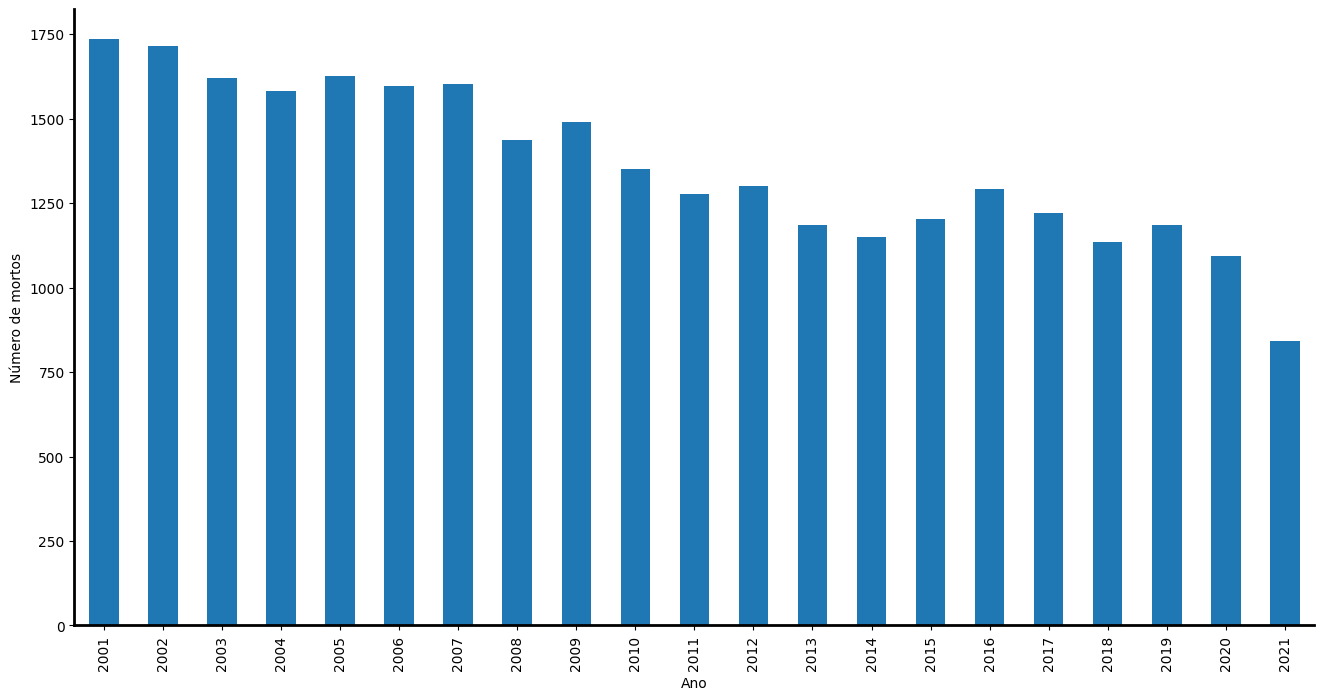

In [215]:
fig, ax = plt.subplots(figsize=(16,8))

df.groupby('Year')['Crash ID'].count().plot.bar()
spines(ax,yl='Número de mortos',xl='Ano') # spines seta os labels x e y do grafico
plt.show()


# Treino do número de óbitos por ano

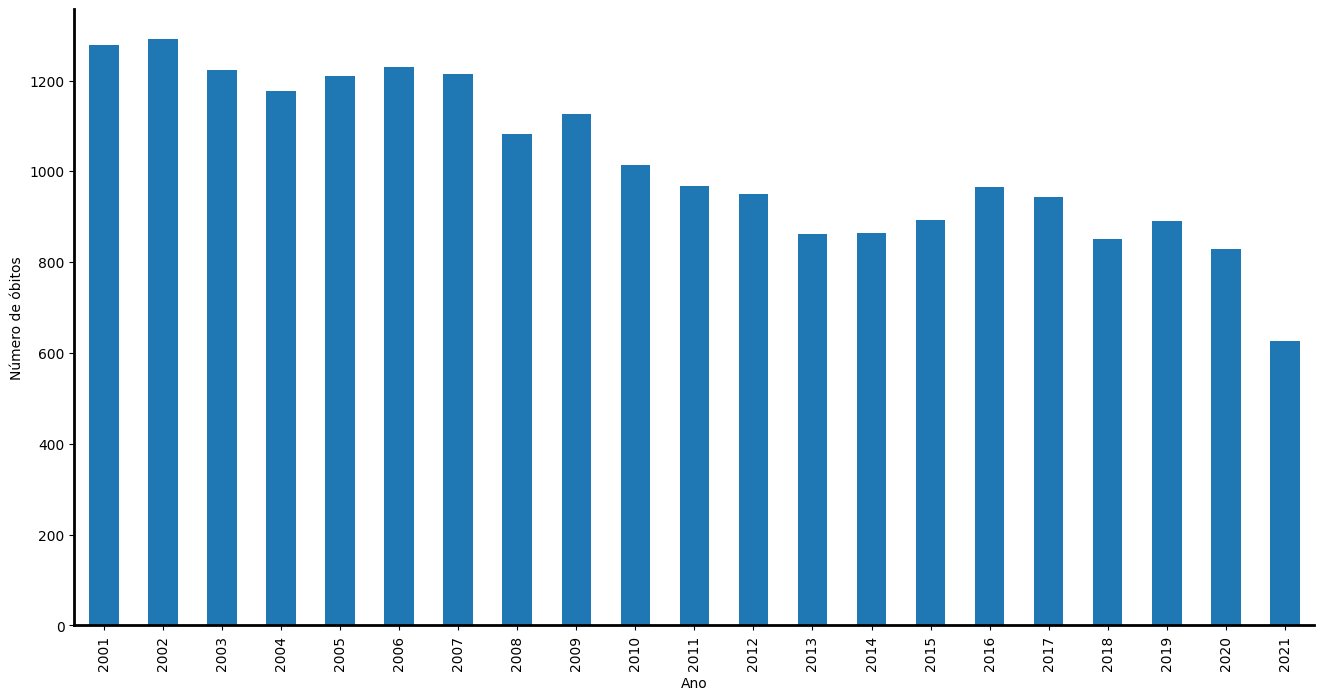

In [216]:
fig, ax = plt.subplots(figsize=(16,8))
X_train.groupby('Year')['Crash ID'].count().plot.bar()
spines(ax,yl='Número de óbitos',xl='Ano') # spines seta os labels x e y do grafico
plt.show()

# Teste do número de óbitos por ano

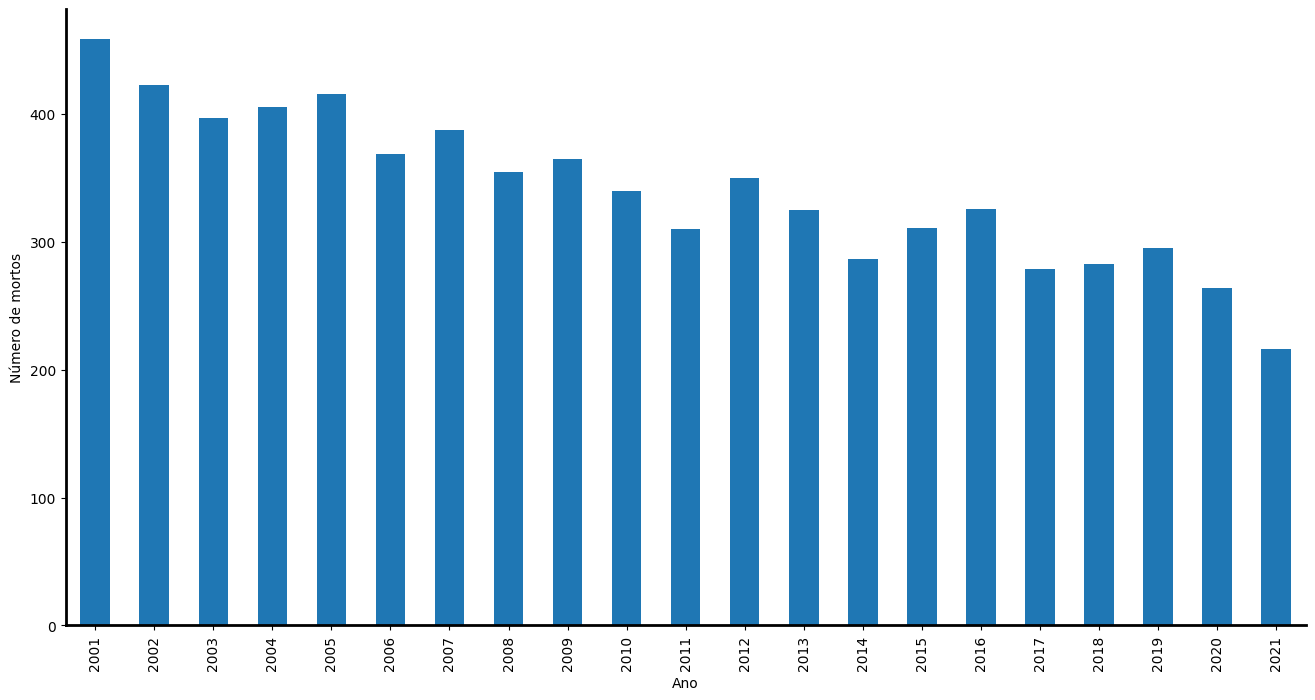

In [217]:
fig, ax = plt.subplots(figsize=(16,8))

X_test.groupby('Year')['Crash ID'].count().plot.bar()
spines(ax,yl='Número de mortos',xl='Ano') # spines seta os labels x e y do grafico
plt.show()

# Dias com mais acidentes

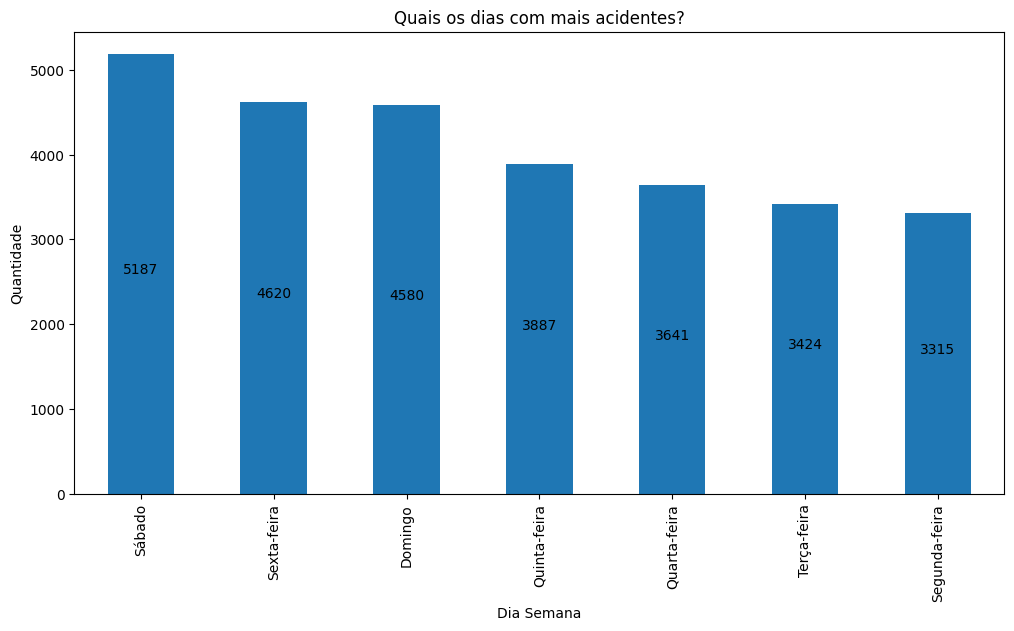

In [218]:
# Cria o grafico
dia        = df["Dayweek"]
quantidade = dia.value_counts()
quantidade.plot(kind='bar',figsize=(12,6))

# Coloca os valores no grafico
dia_semana         = df['Dayweek'].value_counts().sort_index(ascending=False).index.tolist()
quantidade_por_dia = quantidade.value_counts().sort_index(ascending=False).index.tolist()

addValores(dia_semana,quantidade_por_dia)

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Análise de Número de dias que ocorreram acidentes
Foi realizado a análise do número de acidentes por ano do dataset do período de 2001 à 2021

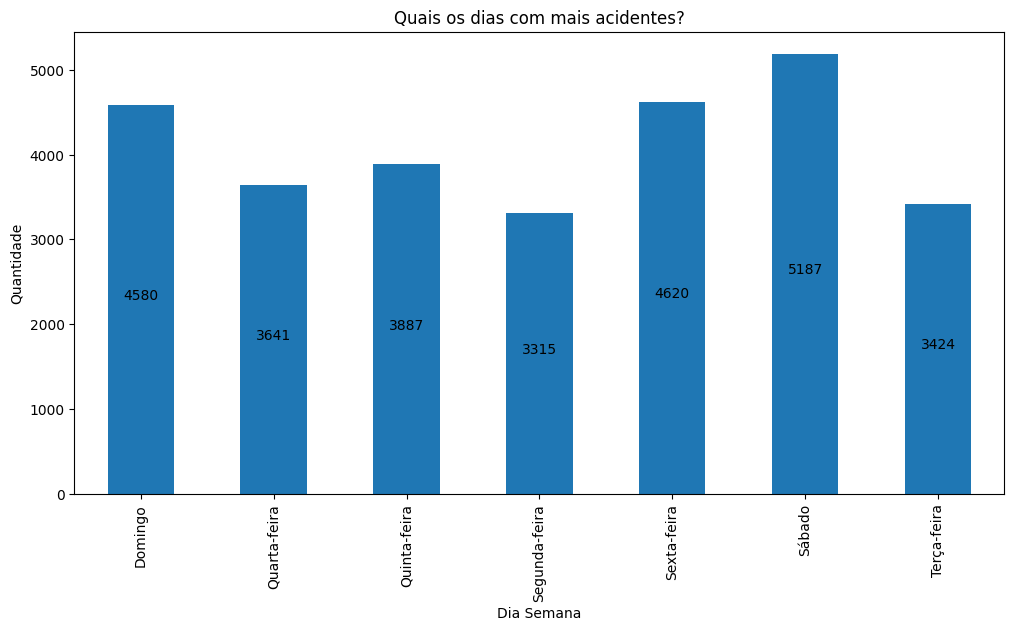

In [219]:
fig, ax = plt.subplots(figsize=(12,6))
df.groupby('Dayweek')['Crash ID'].count().plot.bar()


addValores(dia_semana, df.groupby('Dayweek')['Crash ID'].count().iloc) 

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Treino do número de acidentes por ano

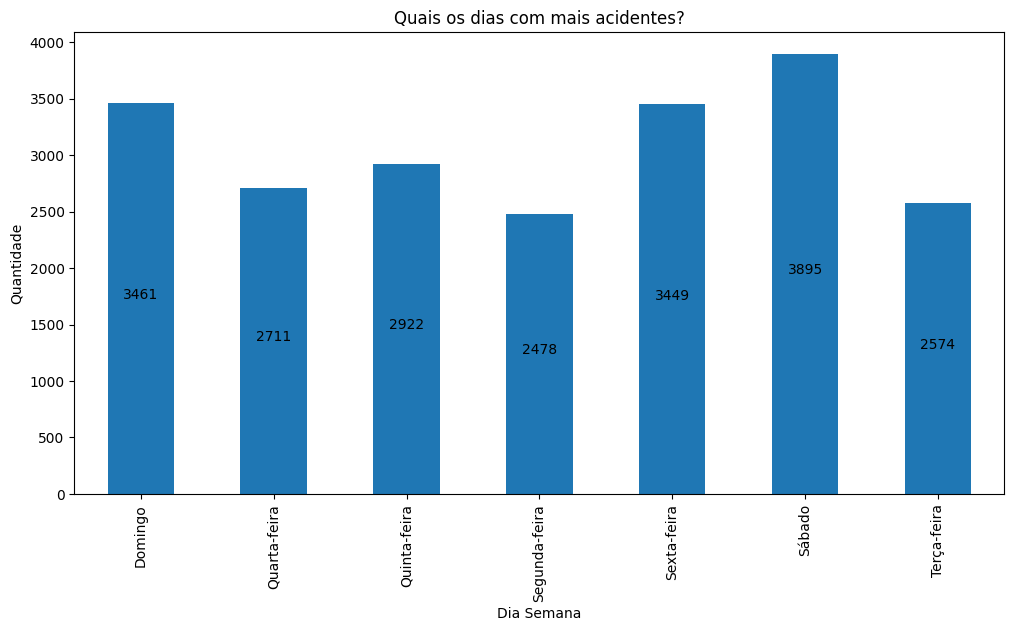

In [220]:
fig, ax = plt.subplots(figsize=(12,6))
X_train.groupby('Dayweek')['Crash ID'].count().plot.bar()

# Adiciona valores no grafico
addValores(dia_semana, X_train.groupby('Dayweek')['Crash ID'].count().iloc) 

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Teste do número de acidentes por ano

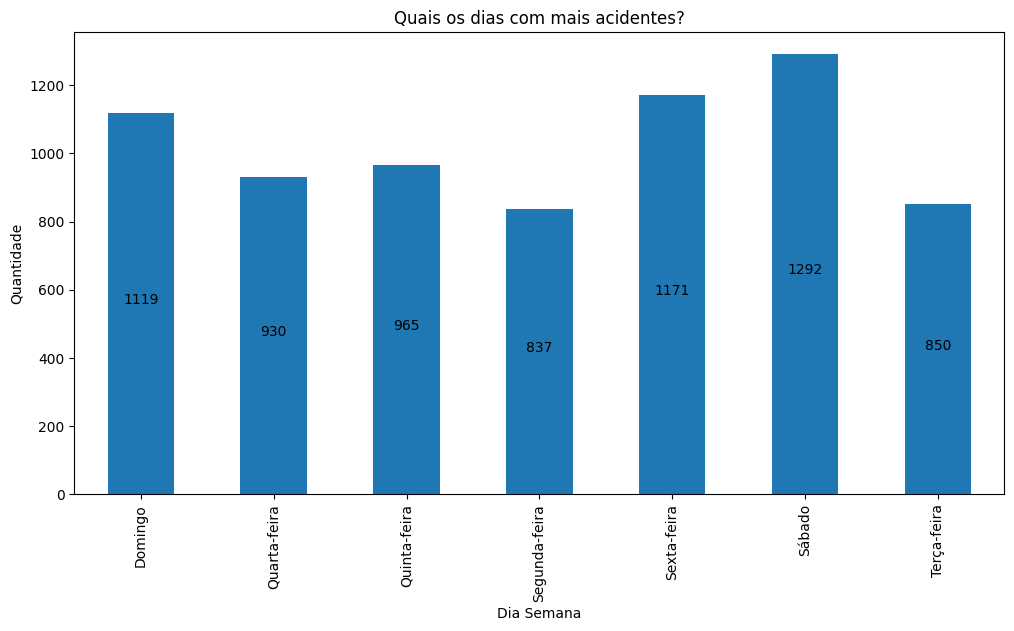

In [221]:
fig, ax = plt.subplots(figsize=(12,6))
X_test.groupby('Dayweek')['Crash ID'].count().plot.bar()

# Adiciona valores no grafico
addValores(dia_semana, X_test.groupby('Dayweek')['Crash ID'].count().iloc) 

# Altera os labels X, Y e o titulo
plt.xlabel('Dia Semana')
plt.ylabel('Quantidade')
plt.title('Quais os dias com mais acidentes?')
plt.show()

# Proporção de óbitos para cada faixa etária

In [222]:
df['Age Group'].value_counts()

Age Group
40_to_64       8301
26_to_39       6664
17_to_25       6649
75_or_older    3071
65_to_74       2151
0_to_16        1793
Name: count, dtype: int64

In [223]:
X_train['Age Group'].value_counts()

Age Group
40_to_64       6204
17_to_25       5012
26_to_39       4969
75_or_older    2308
65_to_74       1609
0_to_16        1372
Name: count, dtype: int64

In [224]:
X_test['Age Group'].value_counts()

Age Group
40_to_64       2097
26_to_39       1695
17_to_25       1637
75_or_older     763
65_to_74        542
0_to_16         421
Name: count, dtype: int64

# Análise dos dados de faixa etária por dia da semana
Realizado a análise dos dados de faixa etária por dia da semana do dataset do período de 2001 à 2021

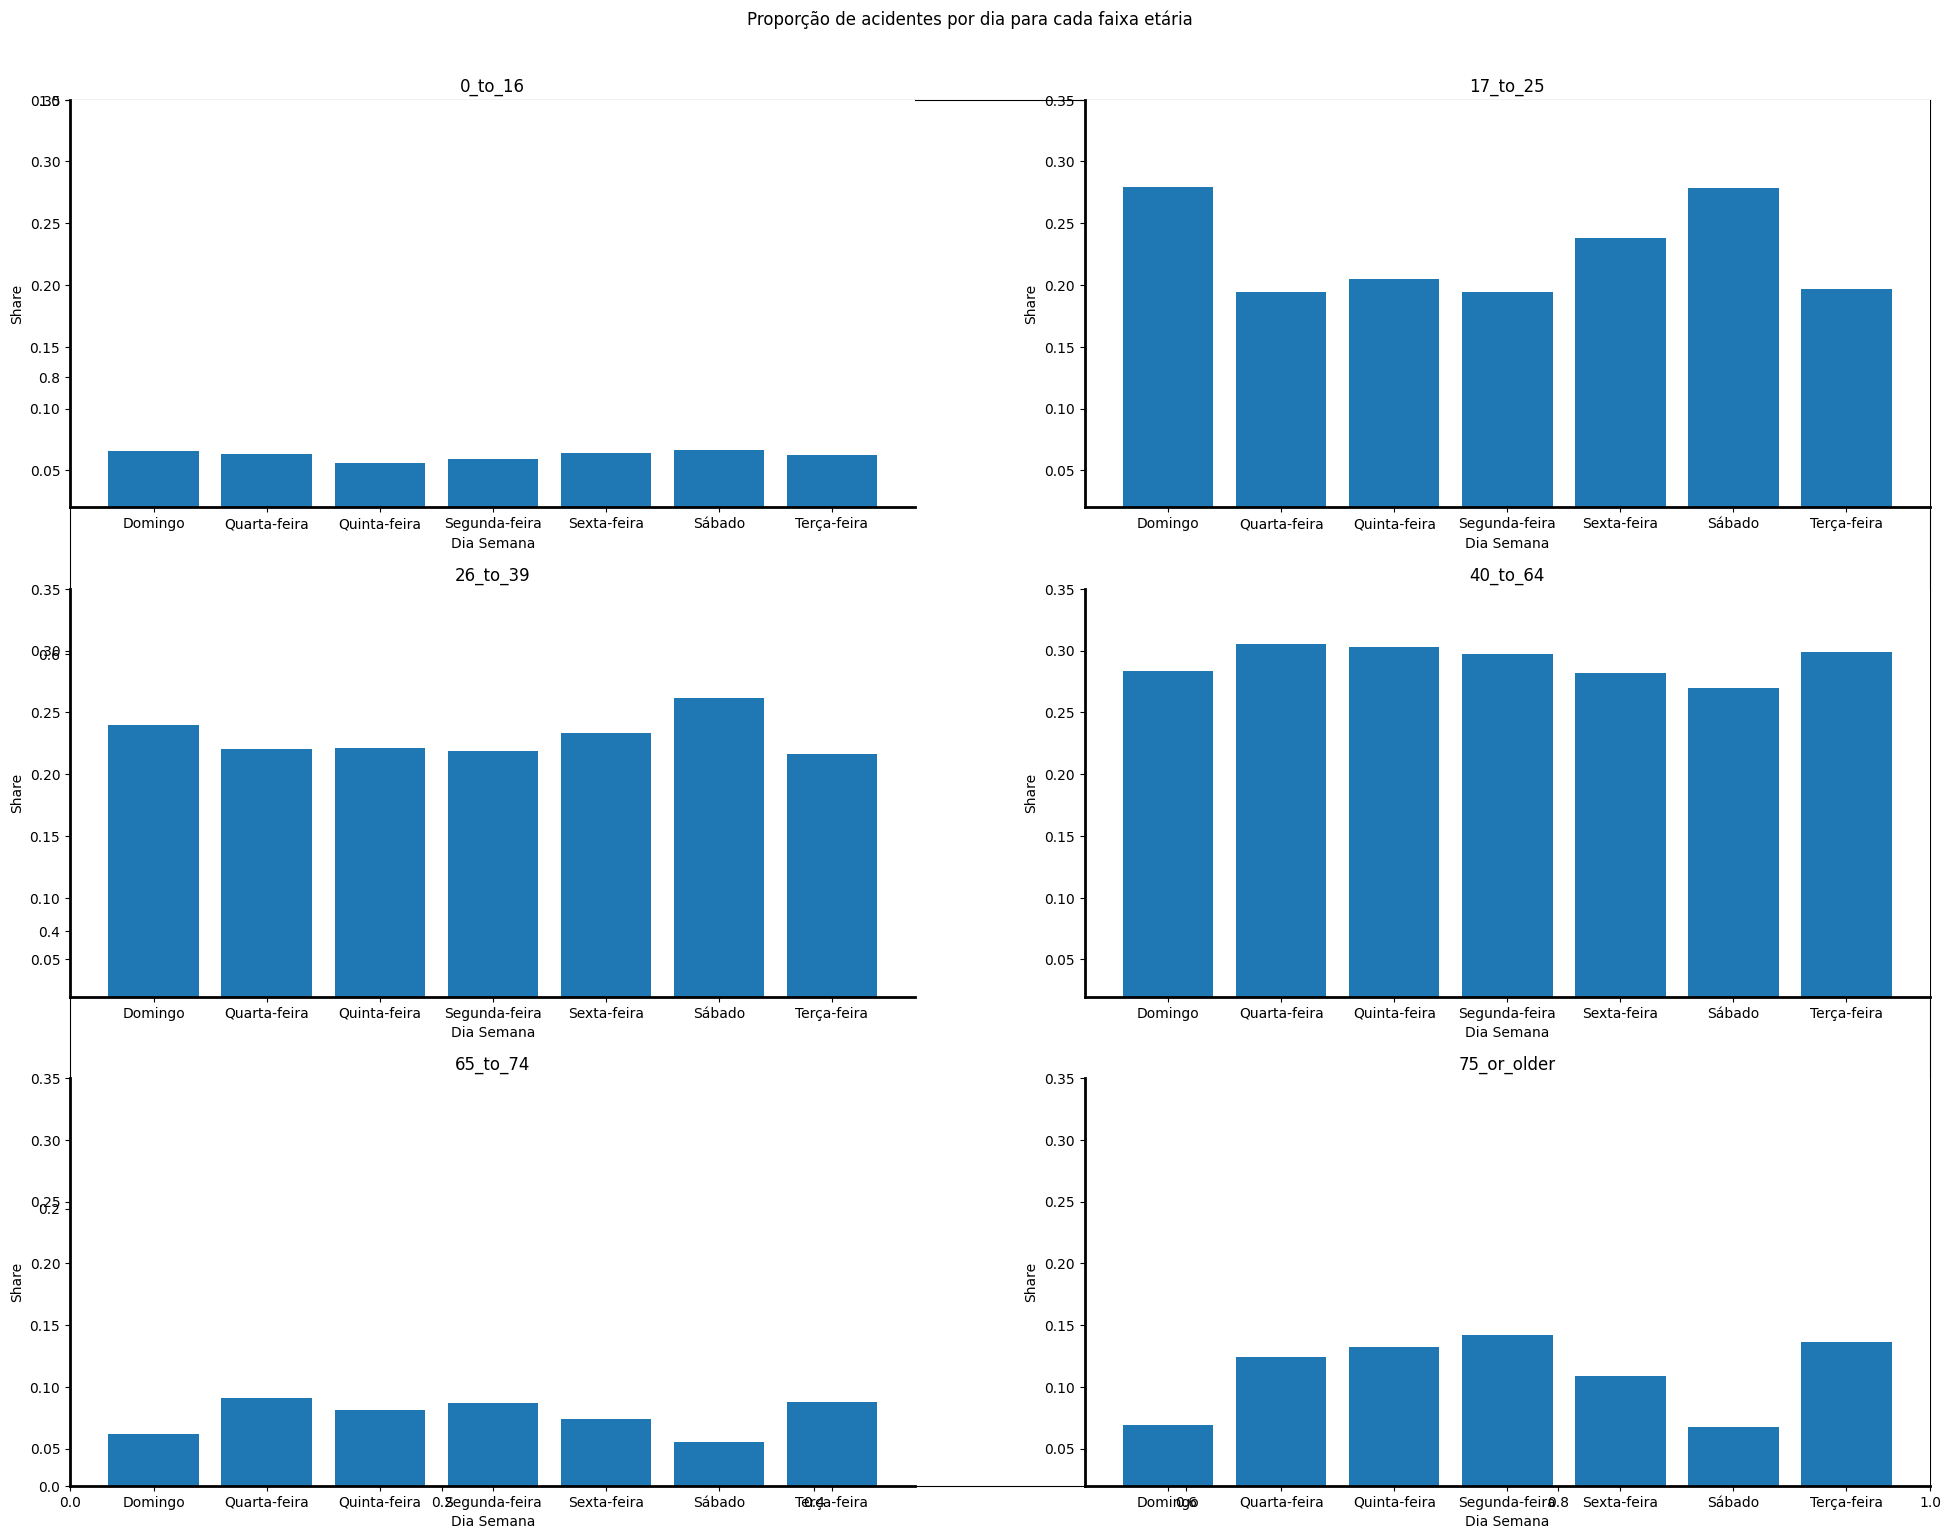

In [225]:
age_groups = df['Age Group'].value_counts().sort_index().index.tolist()
fig, ax = plt.subplots(figsize=(24,18))
fig.suptitle('Proporção de acidentes por dia para cada faixa etária', y=0.93)
n = 0 

for group in age_groups:

    n+=1
    for_plot = df[df['Age Group'] == group].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
    ax = plt.subplot(320+n)
    
    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax,xl="Dia Semana")
    
plt.show()

# Treino da Proporção de acidentes por dia para cada faixa etária
Aplicamos o treino para as amostras selecionadas

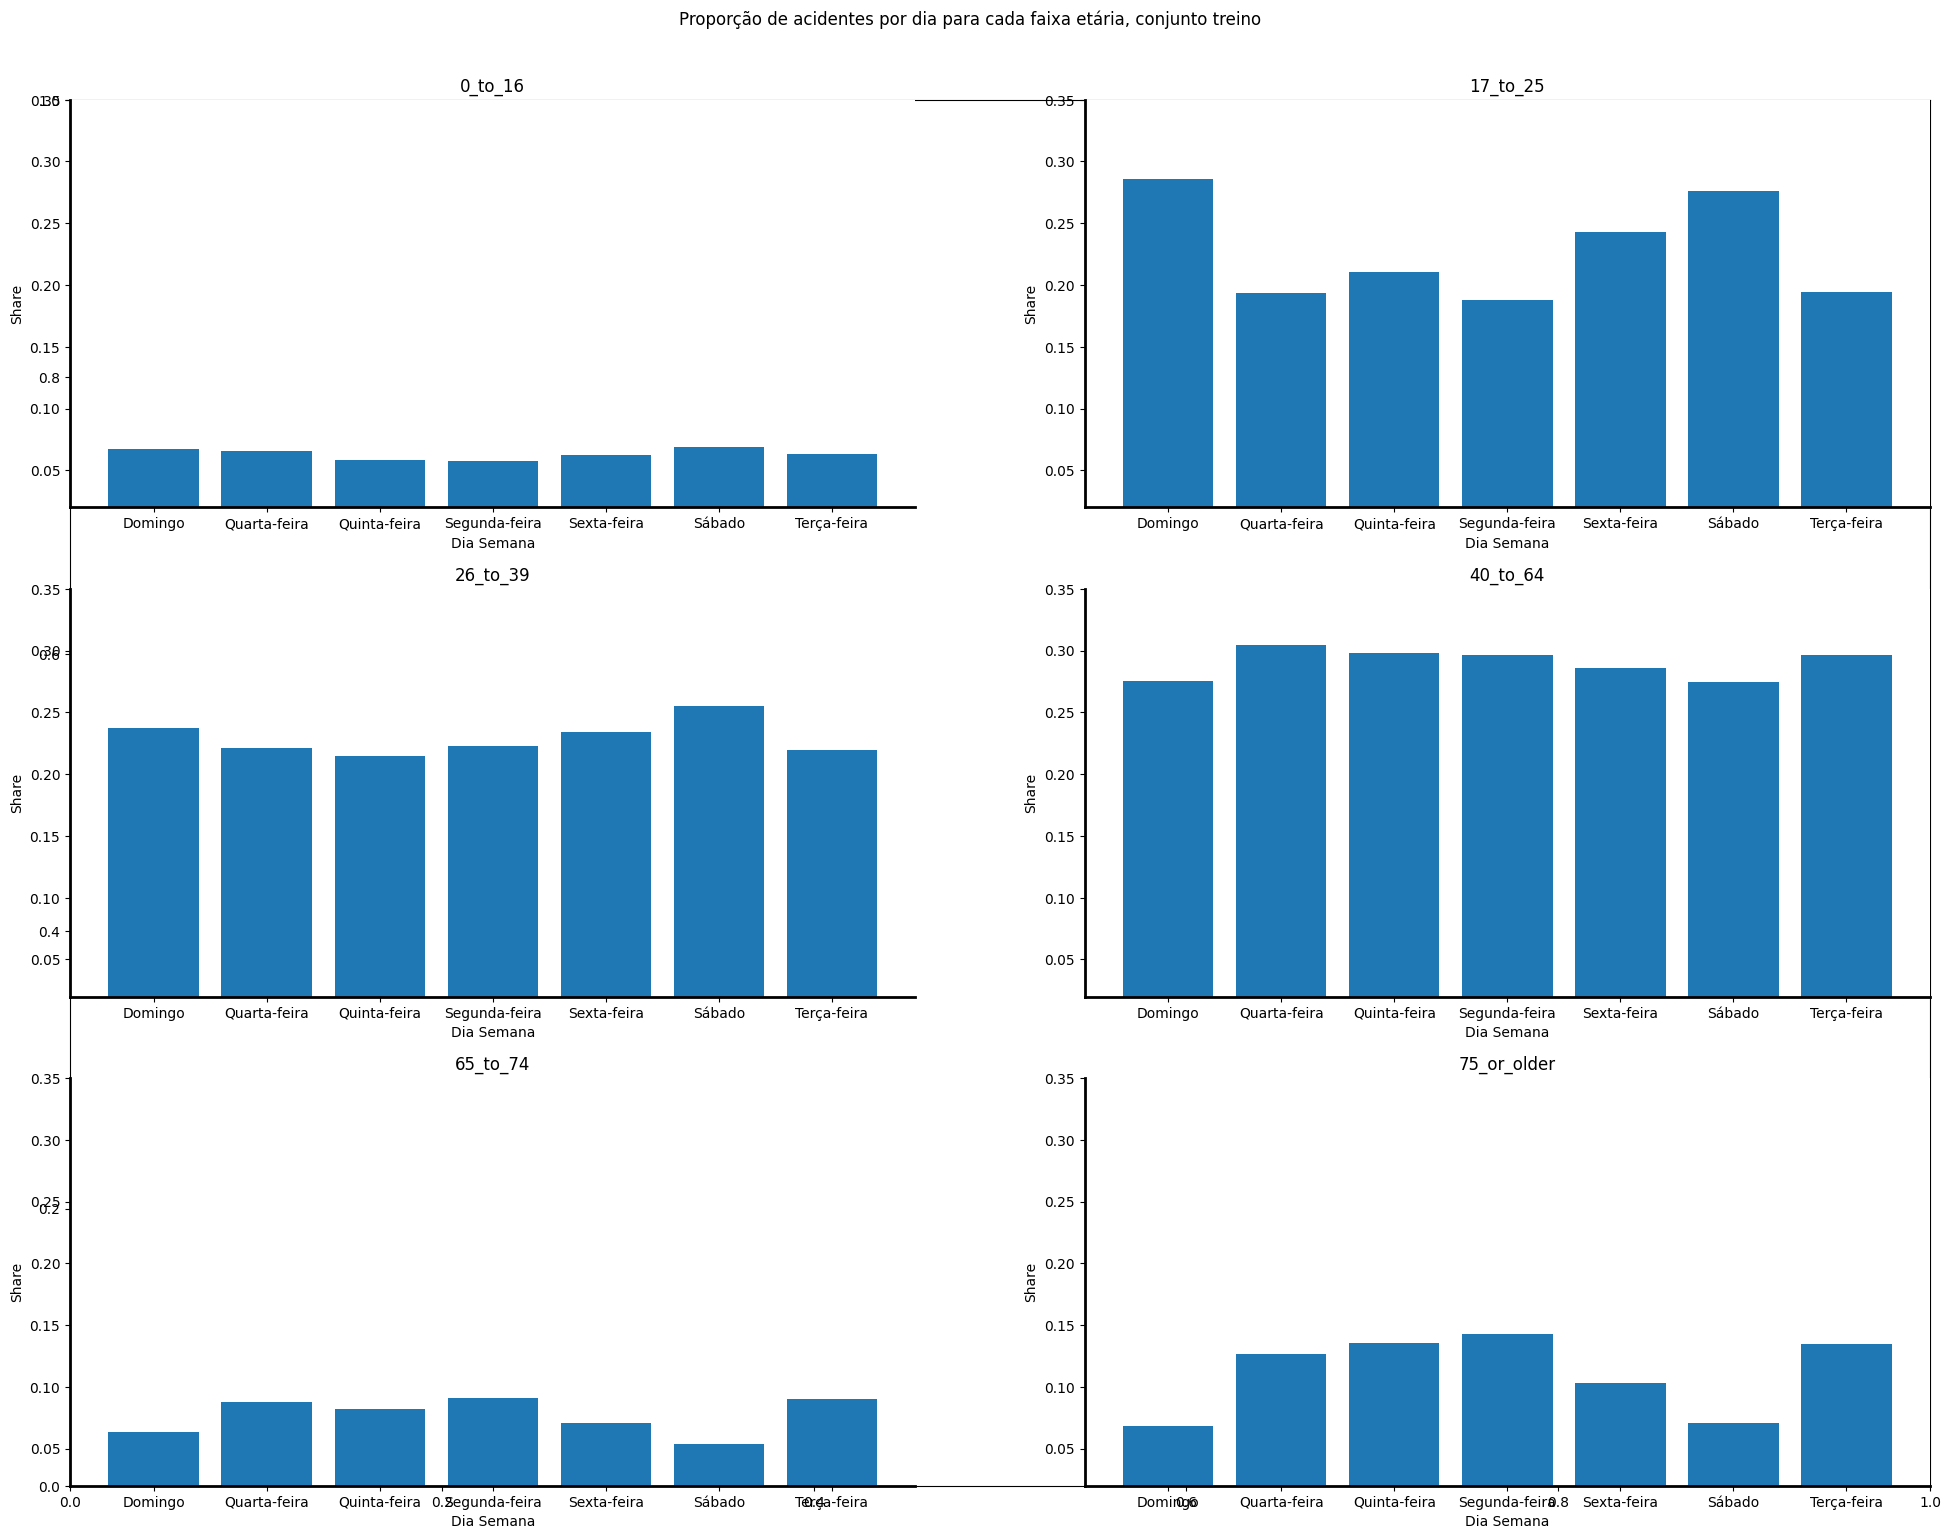

In [226]:
age_groups = X_train['Age Group'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(24,18))
fig.suptitle('Proporção de acidentes por dia para cada faixa etária, conjunto treino', y=0.93)
n = 0 

for group in age_groups:

    n = n + 1
    for_plot = X_train[X_train['Age Group'] == group].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
    ax = plt.subplot(320+n)

    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax,xl="Dia Semana")
    
plt.show()

# Teste da Proporção de acidentes por dia para cada faixa etária
Aplicamos o teste para as amostras selecionadas

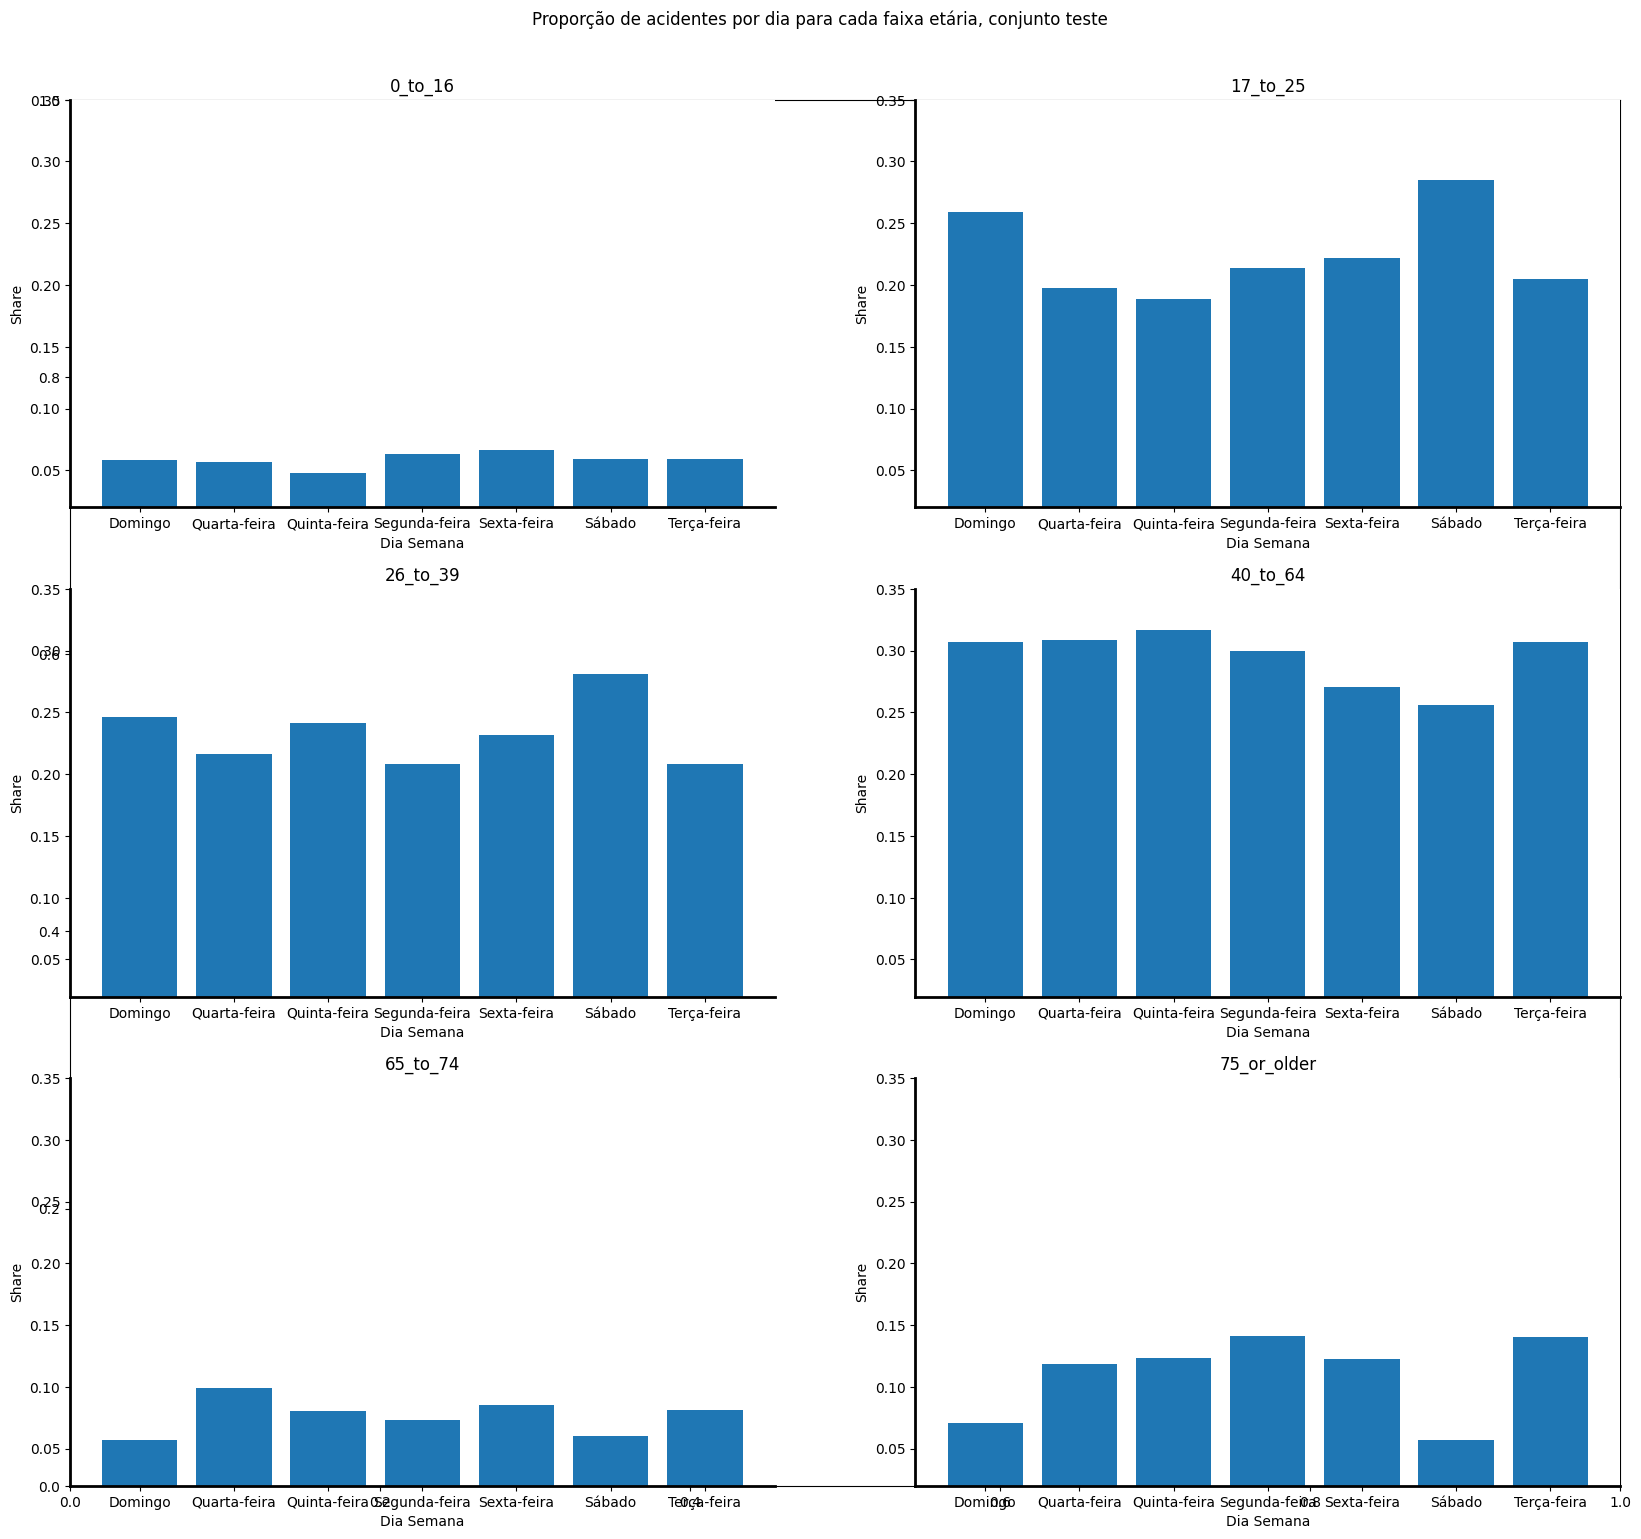

In [227]:
age_groups = X_test['Age Group'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(20,18))
fig.suptitle('Proporção de acidentes por dia para cada faixa etária, conjunto teste', y=0.93)
n = 0 

for group in age_groups:

    n = n + 1
    for_plot = X_test[X_test['Age Group'] == group].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
    ax = plt.subplot(320+n)
    
    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax,xl="Dia Semana")
    
plt.show()

# Análise dos dados de percentuais de mortes por genêro e grupo de idade

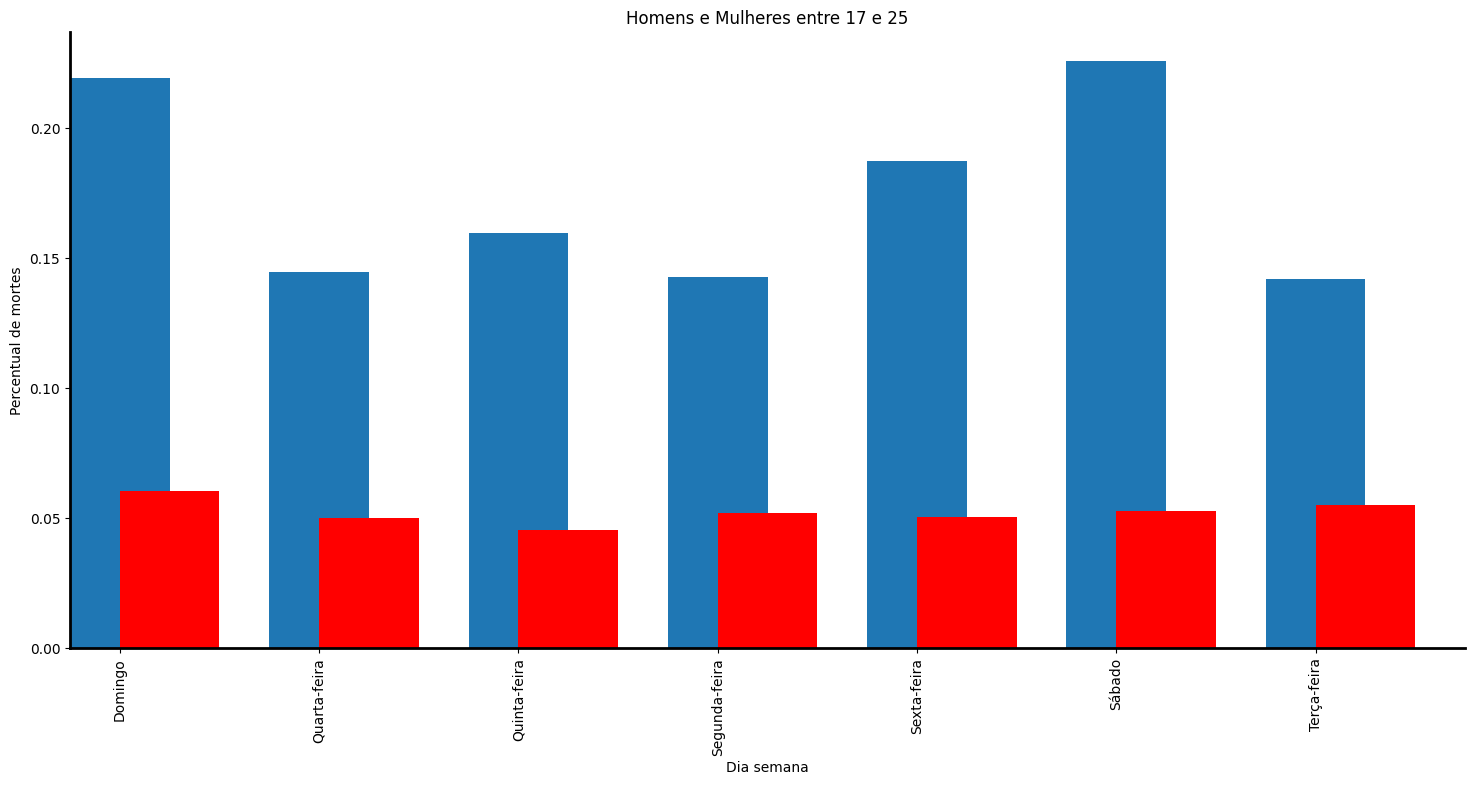

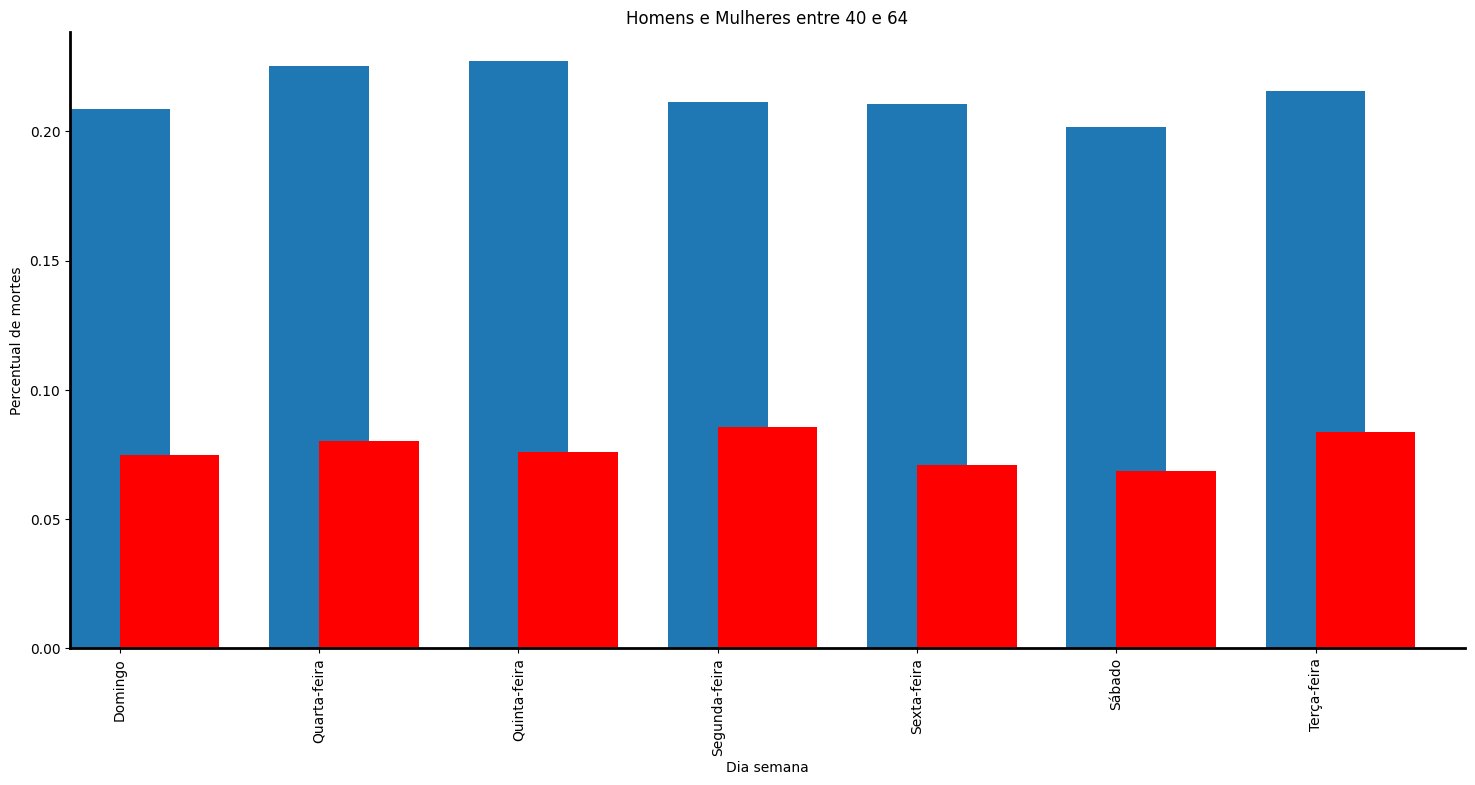

In [228]:
# Mostra o grafico entre 17 e 25 anos
fig, ax = plt.subplots(figsize=(18,8))

# Grafico Homens entre 17 e 25
male_plot = df[(df['Gender']=='Male') & (df['Age Group']=='17_to_25') ].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
male_plot.plot.bar(title='Homens entre 17 e 25')
spines(ax,yl='Percentual de mortes')

# Grafico Mulheres entre 17 e 25
female_plot = df[(df['Gender']=='Female') & (df['Age Group']=='17_to_25') ].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', 
                     title='Homens e Mulheres entre 17 e 25')
spines(ax,yl='Percentual de mortes')

# Mostra o grafico entre 40 e 64 anos
fig, ax = plt.subplots(figsize=(18,8))

# Grafico Homens entre 40 e 64
male_plot = df[(df['Gender']=='Male') & (df['Age Group']=='40_to_64') ].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
male_plot.plot.bar(title='Homens entre 40 e 64')
spines(ax,yl='Percentual de mortes')

# Grafico Mulheres entre 40 e 64
female_plot = df[(df['Gender']=='Female') & (df['Age Group']=='40_to_64') ].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', 
                     title='Homens e Mulheres entre 40 e 64')
spines(ax,yl='Percentual de mortes')

plt.show()

# Treino da proporção de óbitos por genêro e grupo de idade

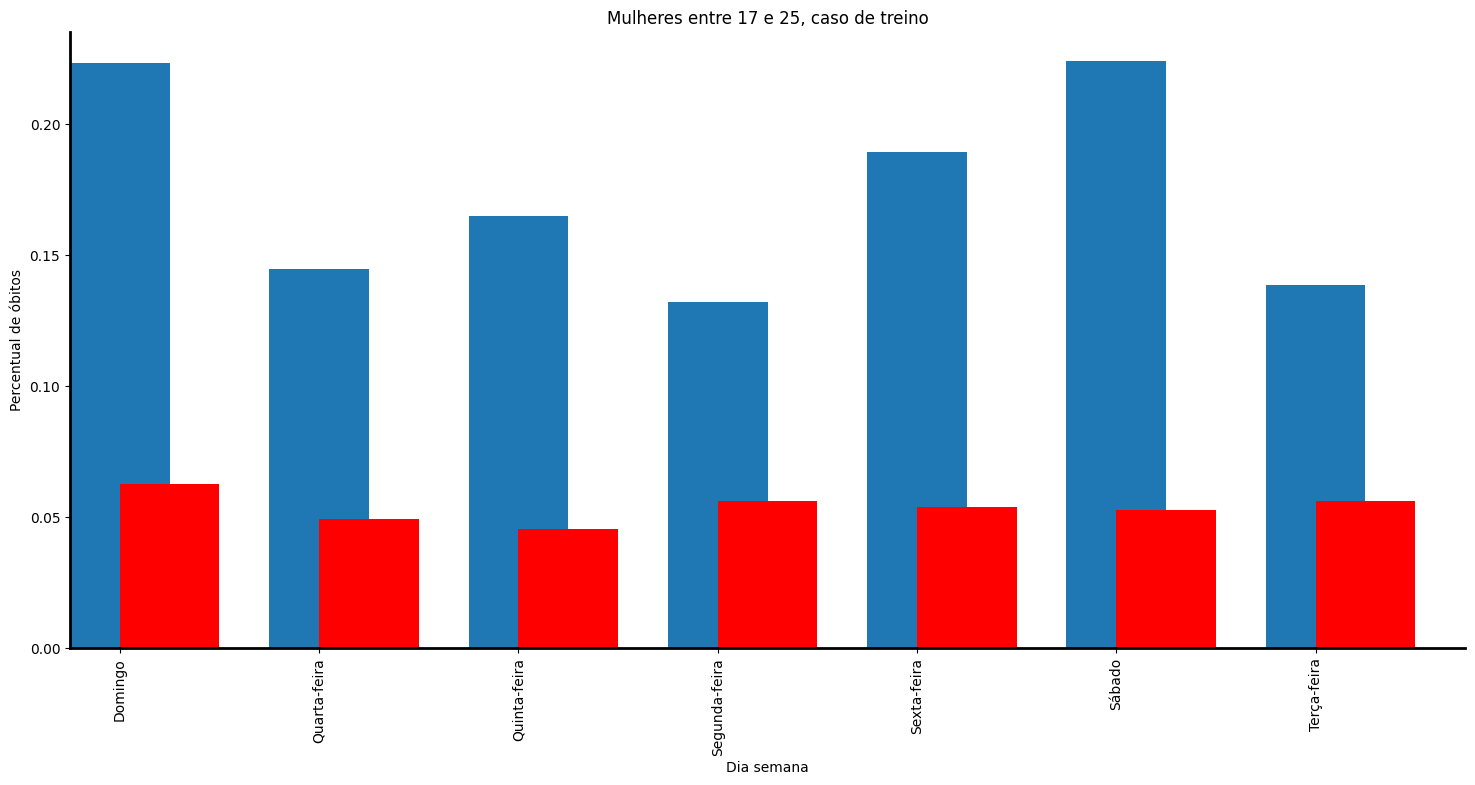

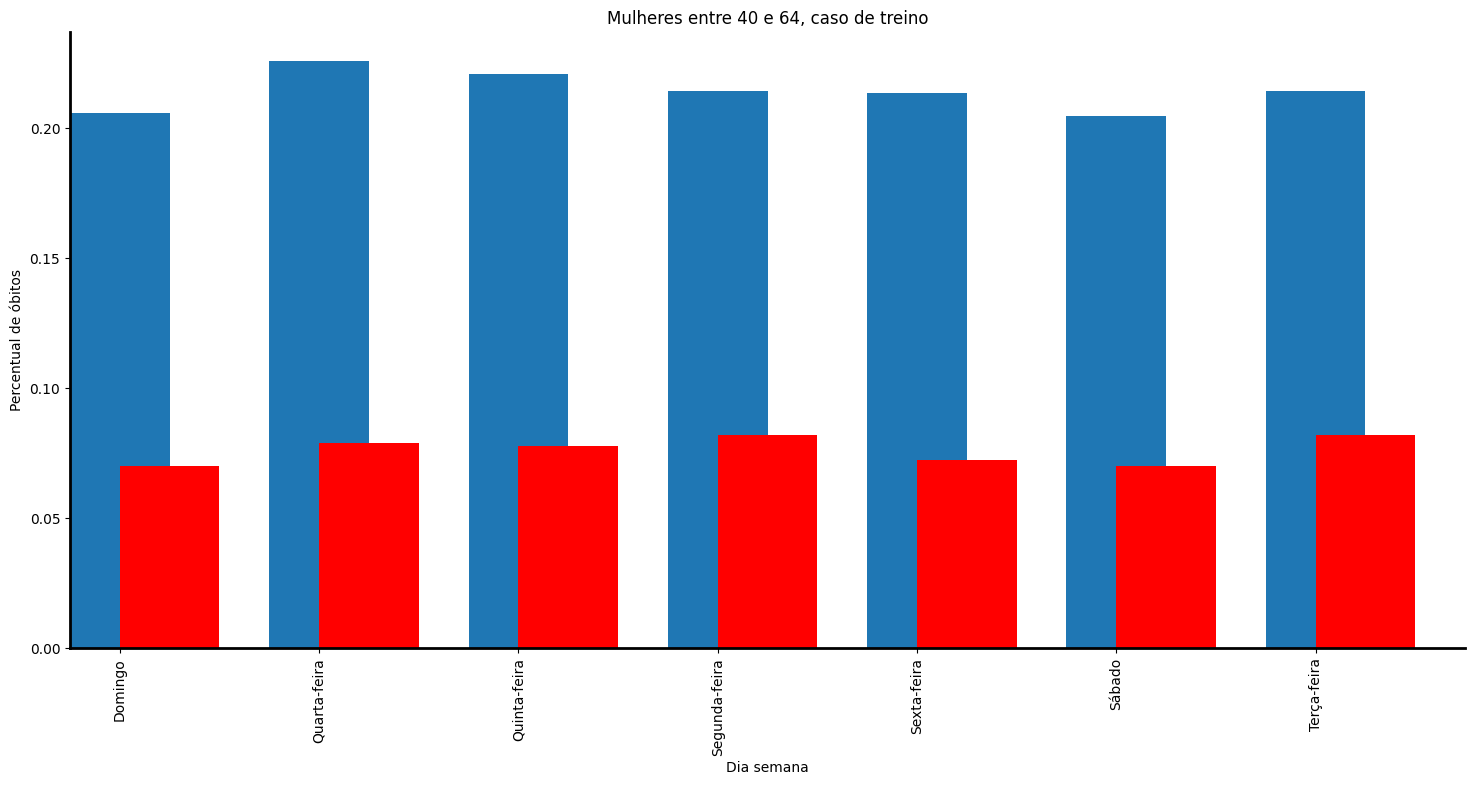

In [229]:
# Mostra o grafico entre 17 e 25 anos
fig, ax = plt.subplots(figsize=(18,8))

# Grafico Homens entre 17 e 25
male_plot = X_train[(X_train['Gender']=='Male') & (X_train['Age Group']=='17_to_25') ].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
male_plot.plot.bar(title='Homens entre 17 e 25, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

# Grafico Mulheres entre 17 e 25
female_plot = X_train[(X_train['Gender']=='Female') & (X_train['Age Group']=='17_to_25') ].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', 
                     title='Mulheres entre 17 e 25, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

# Mostra o grafico entre 40 e 64 anos
fig, ax = plt.subplots(figsize=(18,8))

# Grafico Homens entre 40 e 64
male_plot = X_train[(X_train['Gender']=='Male') & (X_train['Age Group']=='40_to_64') ].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
male_plot.plot.bar(title='Homens entre 40 e 64, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

# Grafico Mulheres entre 40 e 64
female_plot = X_train[(X_train['Gender']=='Female') & (X_train['Age Group']=='40_to_64') ].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', 
                     title='Mulheres entre 40 e 64, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

plt.show()

# Teste da proporção de óbitos por genêro e grupo de idade

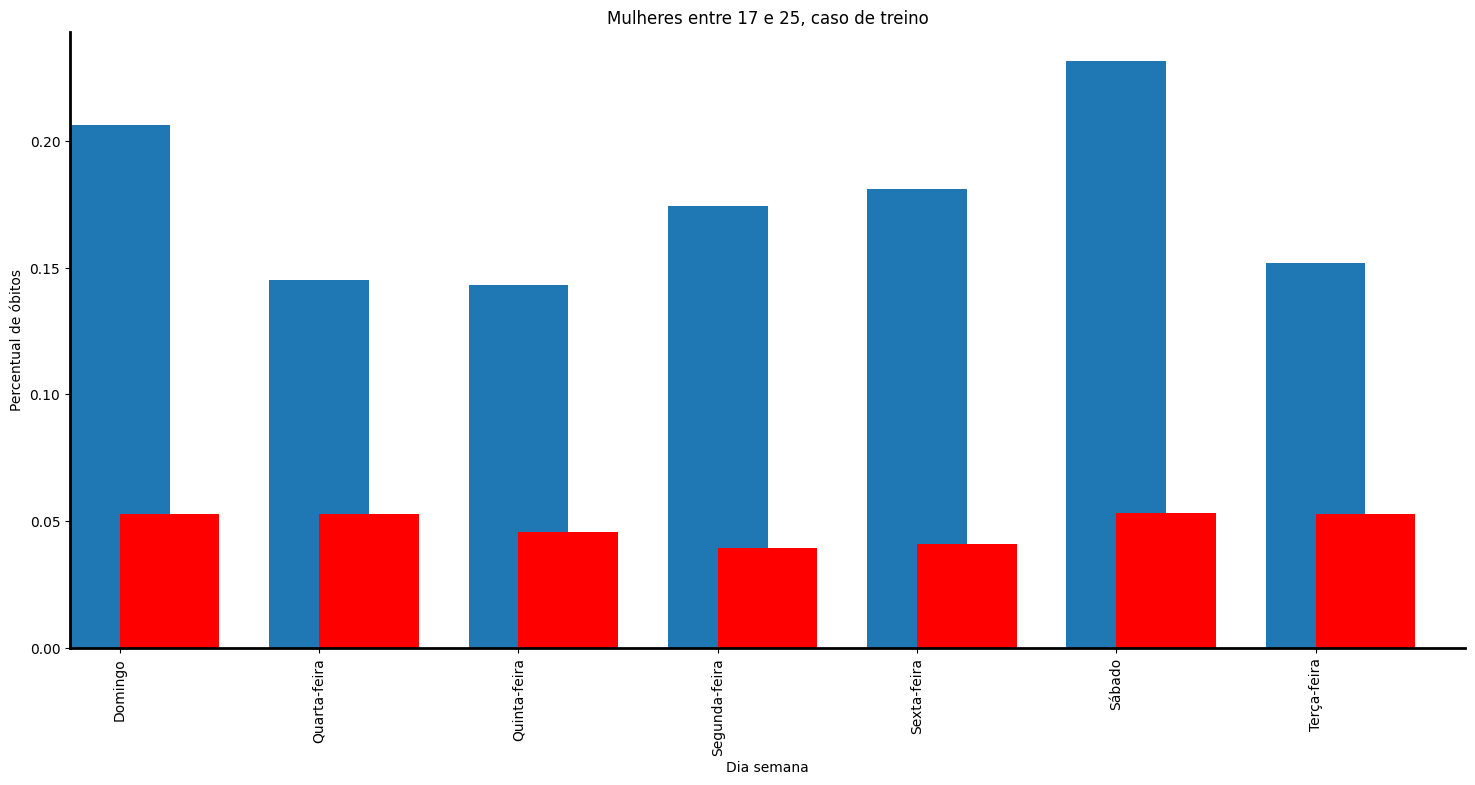

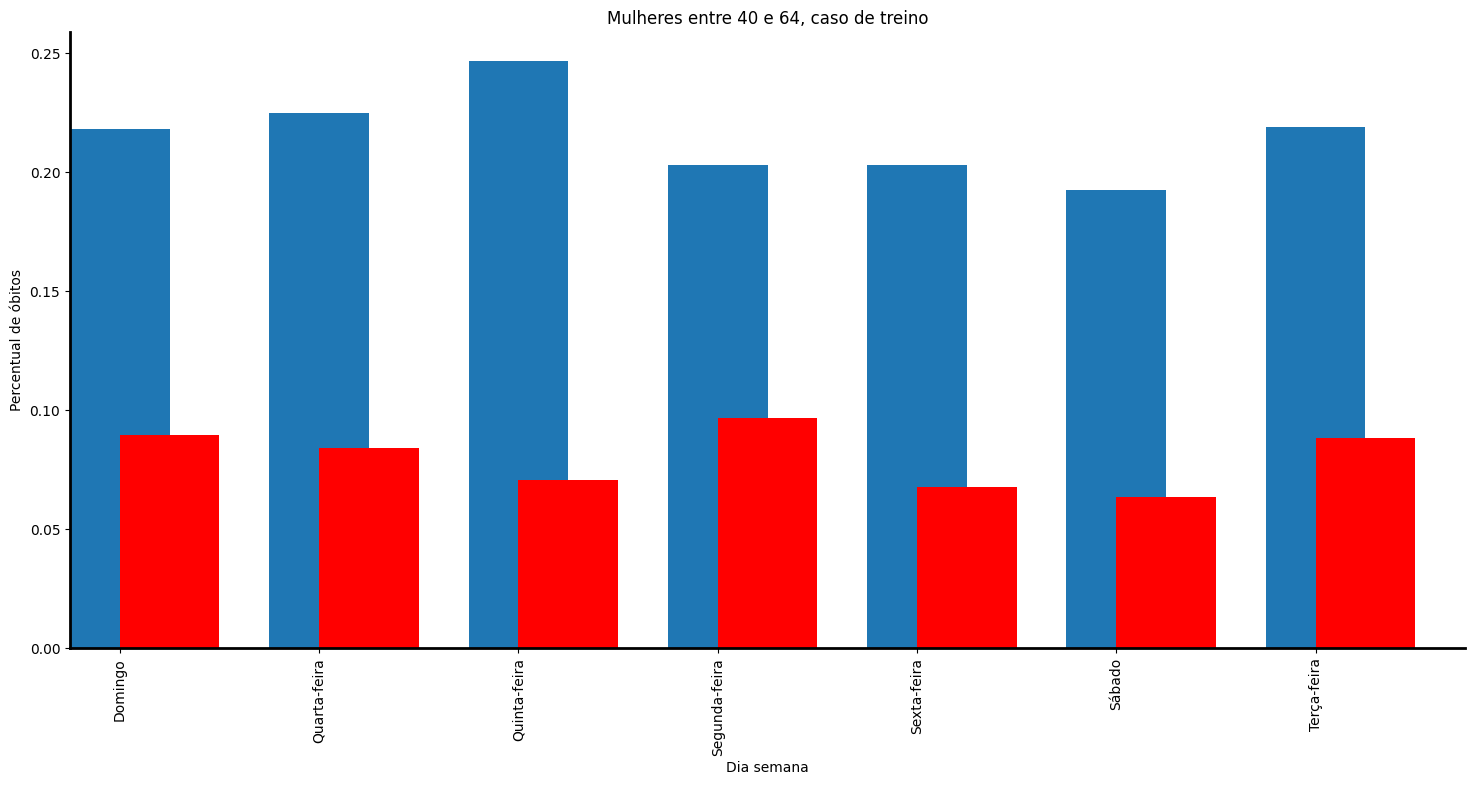

In [230]:
# Mostra o grafico entre 17 e 25 anos
fig, ax = plt.subplots(figsize=(18,8))

# Grafico Homens entre 17 e 25
male_plot = X_test[(X_test['Gender']=='Male') & (X_test['Age Group']=='17_to_25') ].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
male_plot.plot.bar(title='Homens entre 17 e 25, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

# Grafico Mulheres entre 17 e 25
female_plot = X_test[(X_test['Gender']=='Female') & (X_test['Age Group']=='17_to_25') ].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', 
                     title='Mulheres entre 17 e 25, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

# Mostra o grafico entre 40 e 64 anos
fig, ax = plt.subplots(figsize=(18,8))

# Grafico Homens entre 40 e 64
male_plot = X_test[(X_test['Gender']=='Male') & (X_test['Age Group']=='40_to_64') ].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
male_plot.plot.bar(title='Homens entre 40 e 64, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

# Grafico Mulheres entre 40 e 64
female_plot = X_test[(X_test['Gender']=='Female') & (X_test['Age Group']=='40_to_64') ].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', 
                     title='Mulheres entre 40 e 64, caso de treino')
spines(ax,yl='Percentual de óbitos') # spines seta os labels x e y do grafico

plt.show()

# Análise de acidentes por estado

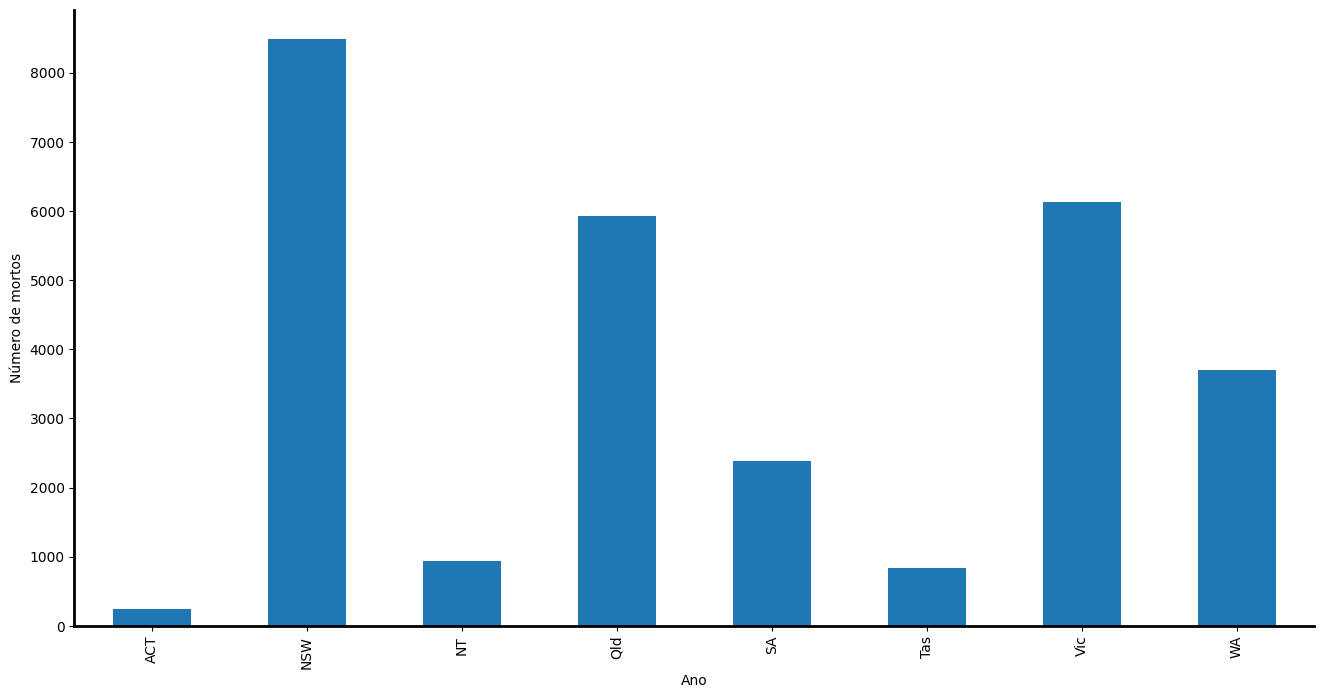

In [231]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby('State')['Crash ID'].count().plot.bar()
spines(ax,yl='Número de mortos',xl='Ano') # spines seta os labels x e y do grafico
plt.show()

# Treino de acidentes por estado

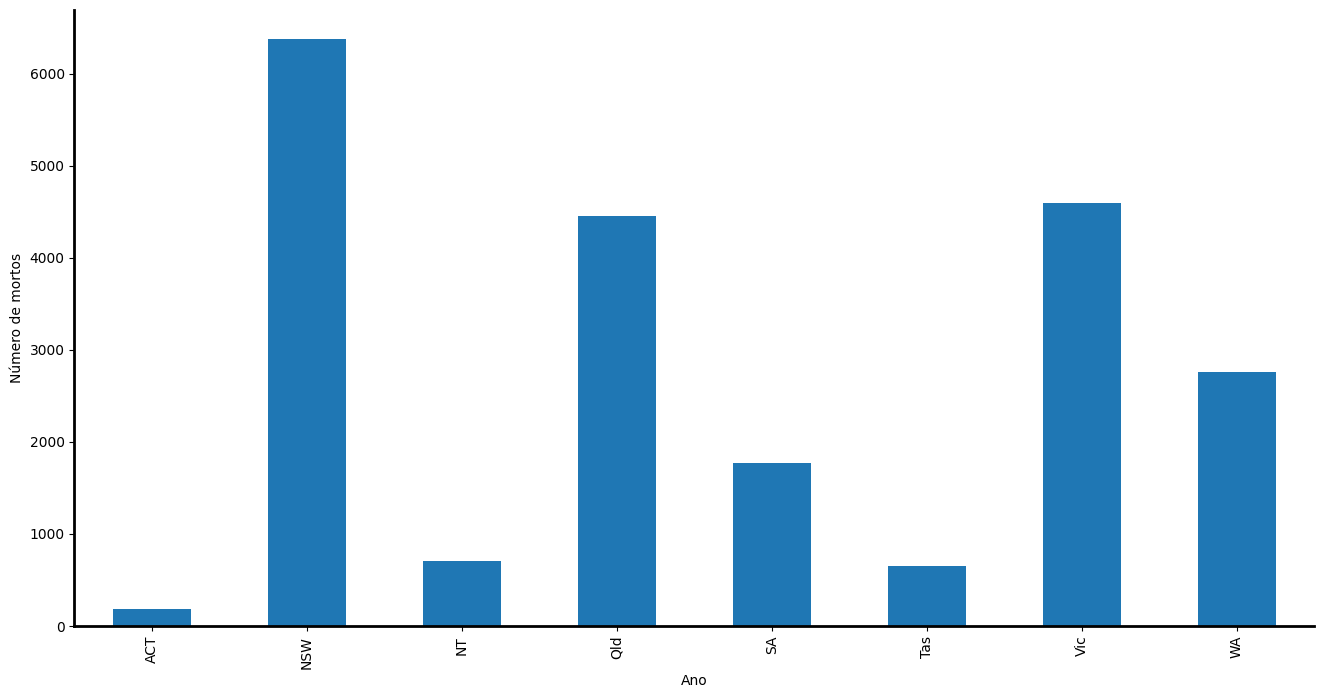

In [232]:
fig, ax = plt.subplots(figsize=(16,8))
X_train.groupby('State')['Crash ID'].count().plot.bar()
spines(ax,yl='Número de mortos',xl='Ano') # spines seta os labels x e y do grafico
plt.show()

# Teste de acidentes por estado

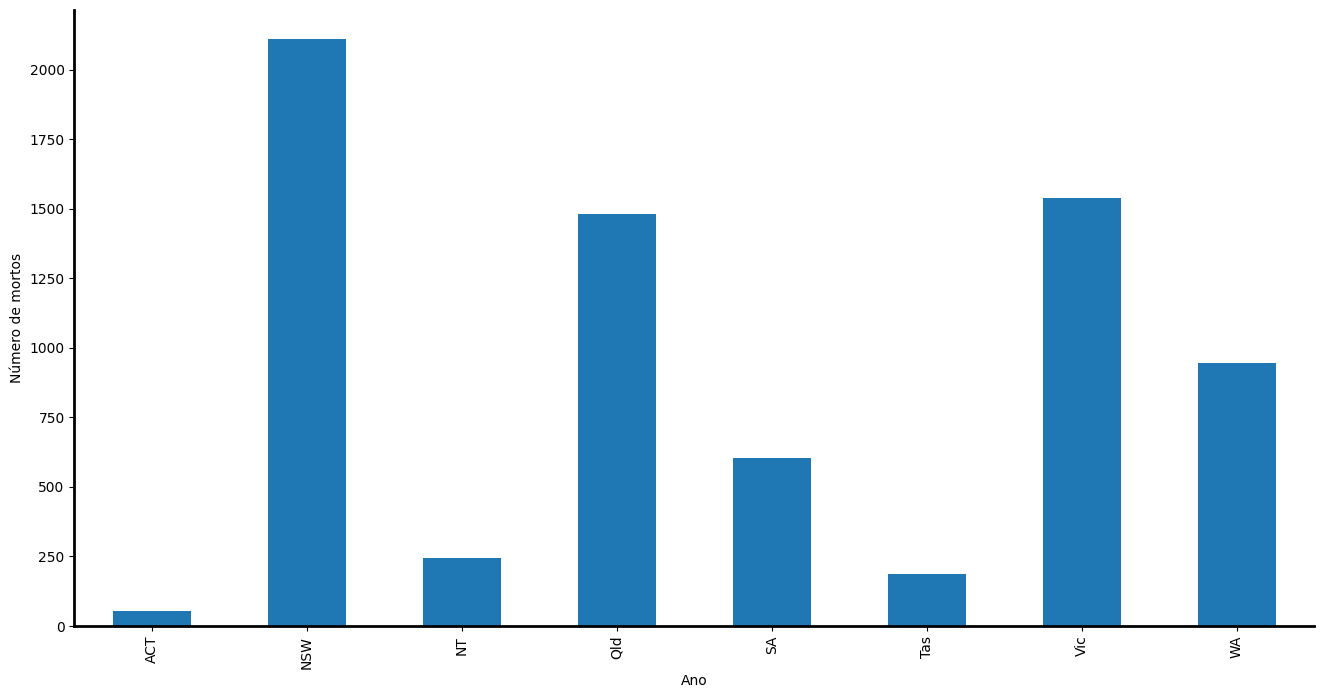

In [233]:
fig, ax = plt.subplots(figsize=(16,8))
X_test.groupby('State')['Crash ID'].count().plot.bar()
spines(ax,yl='Número de mortos',xl='Ano') # spines seta os labels x e y do grafico
plt.show()

# Análise do Percentual de acidentes noite/dia

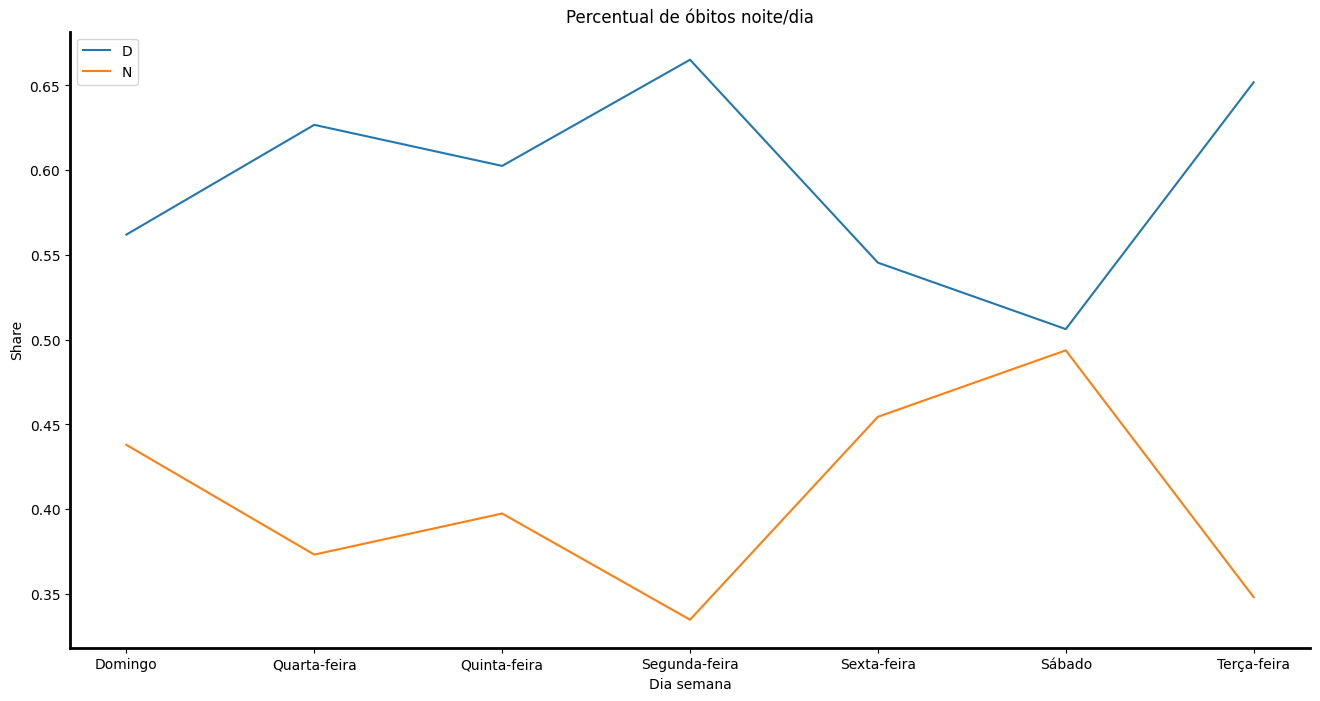

In [234]:
time_groups = df['Time of day'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,8))
n = 0 

for group in time_groups:

    n = n + 1
    for_plot = df[df['Time of day'] == group].groupby('Dayweek')['Crash ID'].count() / df.groupby('Dayweek')['Crash ID'].count()
    plt.plot(for_plot.index, for_plot.values, label=group)
    plt.title('Percentual de óbitos noite/dia')

    plt.legend('DN')
    spines(ax)
    
plt.show()

# Treino do Percentual de acidentes noite/dia

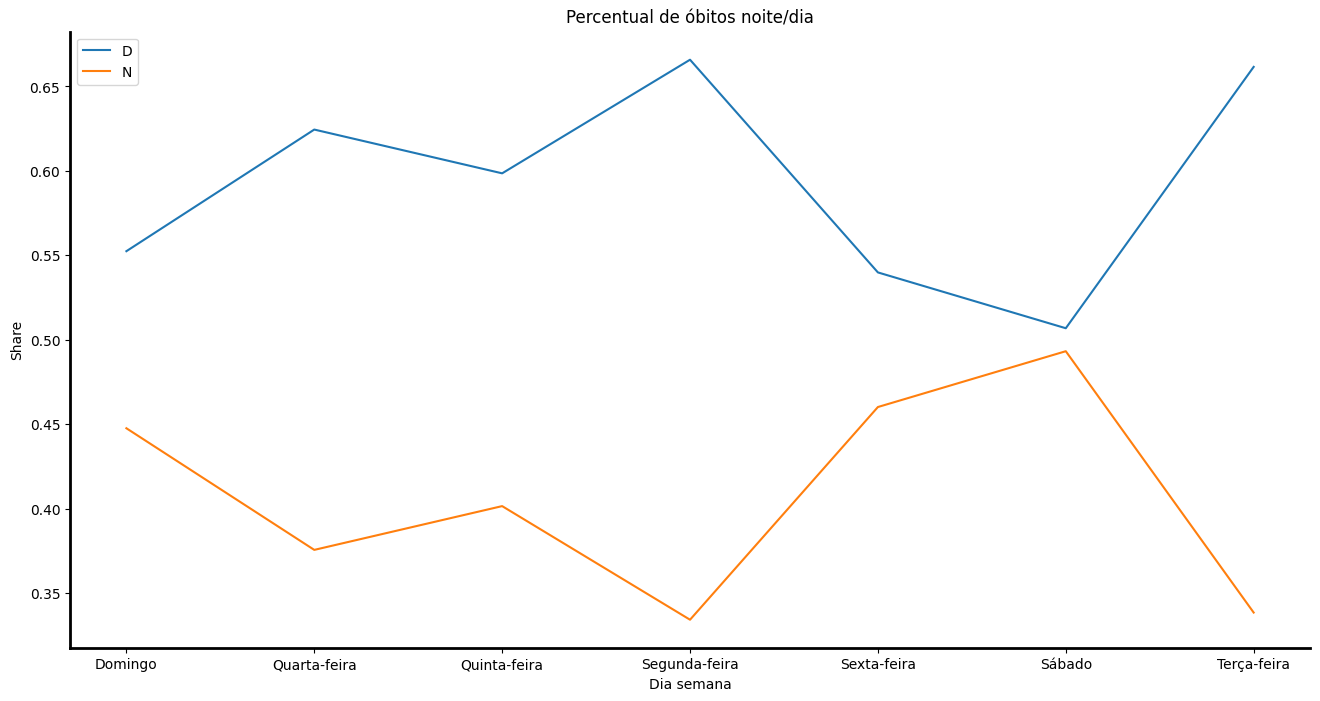

In [235]:
time_groups = X_train['Time of day'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,8))
n = 0 

for group in time_groups:

    n = n + 1
    for_plot = X_train[X_train['Time of day'] == group].groupby('Dayweek')['Crash ID'].count() / X_train.groupby('Dayweek')['Crash ID'].count()
    plt.plot(for_plot.index, for_plot.values, label=group)
    plt.title('Percentual de óbitos noite/dia')

    plt.legend('DN')
    spines(ax)
    
plt.show()

# Teste do Percentual de acidentes noite/dia

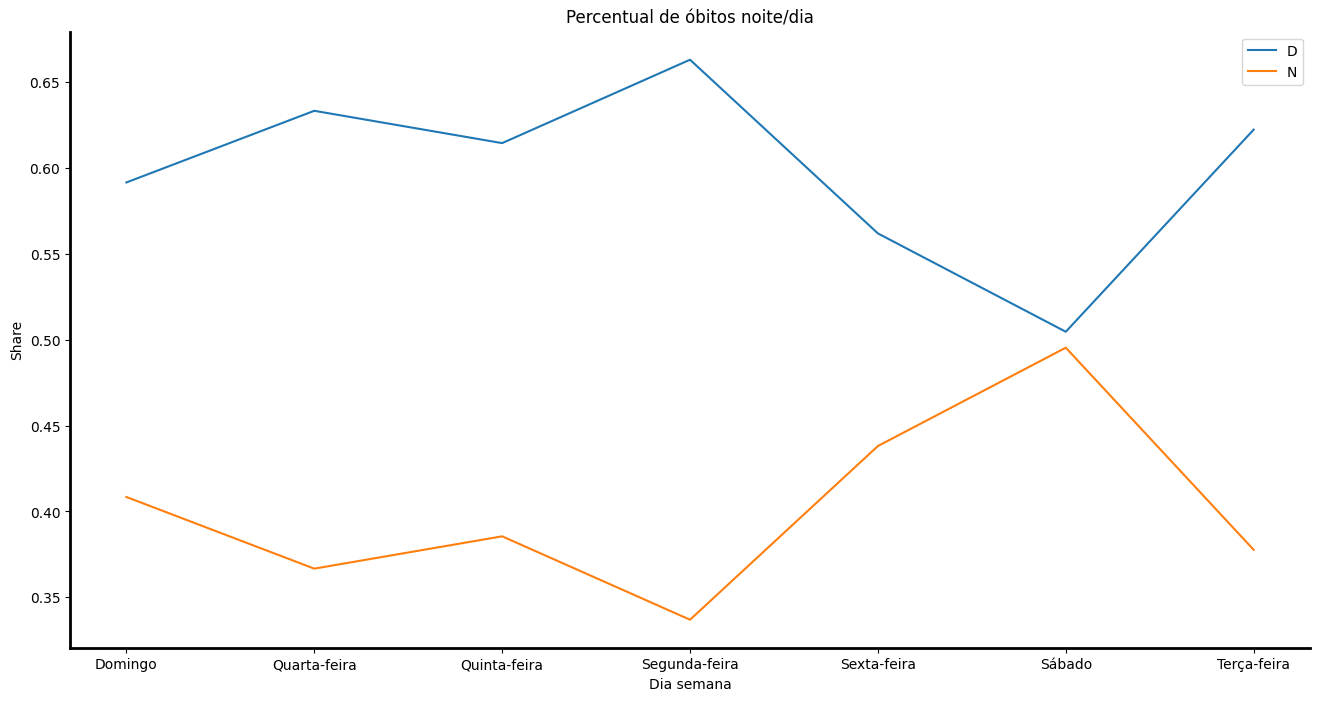

In [236]:
time_groups = X_test['Time of day'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,8))
n = 0 

for group in time_groups:

    n = n + 1
    for_plot = X_test[X_test['Time of day'] == group].groupby('Dayweek')['Crash ID'].count() / X_test.groupby('Dayweek')['Crash ID'].count()
    plt.plot(for_plot.index, for_plot.values, label=group)
    plt.title('Percentual de óbitos noite/dia')

    plt.legend('DN')
    spines(ax)
    
plt.show()